In [66]:
import pandas as pd
from matplotlib import animation as animation, pyplot as plt, cm
import string
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

In [2]:
participants = pd.read_csv("C:\\Users\\schai\\Downloads\\part_pro_df.csv")

organizers = pd.read_csv("C:\\Users\\schai\\Downloads\\org_pro_df.csv")
clubs = pd.read_csv("C:\\Users\\schai\\Downloads\\clubs_pro_df.csv")

In [3]:
del organizers["Unnamed: 0"]
del clubs["Unnamed: 0"]

In [4]:
del participants["Unnamed: 0"]

In [5]:
participants.columns

Index(['Fest_Name', 'Name', 'Event', 'First Name', 'Last Name', 'Name1',
       'RollNumber'],
      dtype='object')

In [7]:
fest_unique = participants["Fest_Name"].unique()

In [8]:
fest_unique

array(['fest_1', 'fest_2'], dtype=object)

In [9]:
metadata = pd.read_csv("C:\\Users\\schai\\Downloads\\MU-Hiring-2022-main\\MU-Hiring-2022-main\\Metadata.csv")

In [20]:
df["ID"] = list( fest_participated.keys())

In [21]:
df

,ID,Fest 1,Fest 2
0,18XJ1A0100,NaN,NaN
1,18XJ1A0101,NaN,NaN
2,18XJ1A0102,NaN,NaN
3,18XJ1A0103,NaN,NaN
4,18XJ1A0104,NaN,NaN
...,...,...,...
495,17XJ1A0345,NaN,NaN
496,17XJ1A0346,NaN,NaN
497,17XJ1A0347,NaN,NaN
498,17XJ1A0348,NaN,NaN


In [23]:
for i in range(len(df)):
#     print(len(fests[i]))
    if len(fests[i]) == 2:
        df["Fest 1"][i] = "True"
        df["Fest 2"][i] = "True"
    if len(fests[i]) == 1:
        if fests[i][0] == "fest_1":
            df["Fest 1"][i] = "True"
            df["Fest 2"][i] = "False"
        elif fests[i][0] == "fest_2":
            df["Fest 1"][i] = "False"
            df["Fest 2"][i] = "True"
    if len(fests[i]) == 0:
        df["Fest 1"][i] = "False"
        df["Fest 2"][i] = "False"
            
    

In [25]:
count_both_fests = 0
count_one_fests = 0
count_none_fests = 0

for i in range(len(df["ID"])):
    if df["Fest 1"][i] == "True" and df["Fest 2"][i] == "True":
        count_both_fests += 1
    elif df["Fest 1"][i] == "False" and df["Fest 2"][i] == "True":
        count_one_fests += 1
    elif df["Fest 1"][i] == "True" and df["Fest 2"][i] == "False":
        count_one_fests += 1
    else:
        count_none_fests+=1

In [26]:
count_fest_1 , count_fest_2 = 0,0

for i in range(len(df)):
    if df["Fest 1"][i] == "True":
        count_fest_1 += 1
    if df["Fest 2"][i] == "True":
        count_fest_2 += 1


# count_fest_1 = len([df["Fest 1"] == "True"])
# count_fest_2 = len([df["Fest 2"] == "True"])

# print(count_fest_1, count_fest_2)

In [27]:
count_fest_1, count_fest_2

(343, 350)

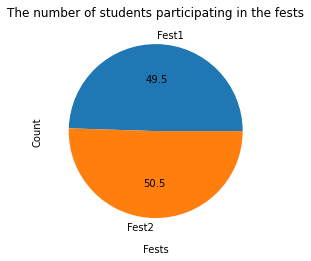

In [28]:
plt.pie([count_fest_1, count_fest_2], labels = ["Fest1", "Fest2"], autopct="%1.1f")
# plt.scatter()
plt.title("The number of students participating in the fests")
plt.xlabel("Fests")
plt.ylabel("Count")
plt.show()

In [30]:
count_both_fests, count_one_fests, count_none_fests

(337, 19, 144)

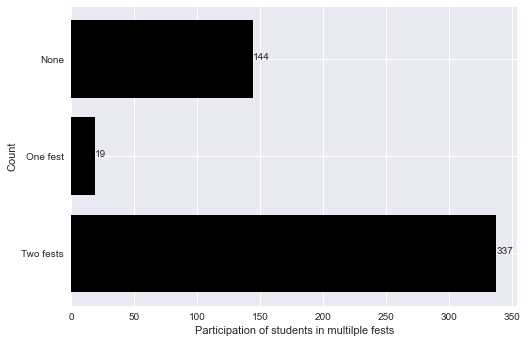

In [32]:
plt.barh(["Two fests", "One fest", "None"],[count_both_fests, count_one_fests, count_none_fests],color = "black",  ecolor = "g",animated= True)
y = [count_both_fests, count_one_fests, count_none_fests]
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

    
    

    
plt.xlabel("Participation of students in multilple fests")
plt.ylabel("Count")
plt.show()

337+19 are attennding fests
144 are not attending fests



In [34]:
participants["Fest Num"] = None
participants["Event Num"] = None
participants


,Fest_Name,Name,Event,First Name,Last Name,Name1,RollNumber,Fest Num,Event Num
0,fest_1,ADRIAN GRAFF,fest_1_event_9,adrian,graff,adrian graff,18XJ1A0125,None,None
1,fest_2,gerald arreola,fest_2_event_3,gerald,arreola,gerald arreola,17XJ1A0252,None,None
2,fest_1,EFRAIN TRUJILLO,fest_1_event_10,efrain,trujillo,efrain trujillo,17XJ1A0129,None,None
3,fest_1,MADISEN DECKER,fest_1_event_10,madisen,decker,madisen decker,18XJ1A0229,None,None
4,fest_1,YULISA DENSON,fest_1_event_8,yulisa,denson,yulisa denson,17XJ1A0325,None,None
...,...,...,...,...,...,...,...,...,...
4760,fest_1,CM,fest_1_event_4,cm,NaN,cm,NaN,None,None
4761,fest_2,SS,fest_2_event_4,ss,NaN,ss,NaN,None,None
4762,fest_2,PM,fest_2_event_2,pm,NaN,pm,NaN,None,None
4763,fest_2,Roena ooni,fest_2_event_12,roena,ooni,roena ooni,NaN,None,None


In [35]:
participants["Event"][0].split("_", 2)

['fest', '1', 'event_9']

In [36]:
for i in range(len(participants)):
    split_arr = participants["Event"][i].split("_",2)
    participants["Fest Num"][i] = split_arr[0] + "_"  +split_arr[1]
    participants["Event Num"][i] = split_arr[2]
    

In [37]:
participants

,Fest_Name,Name,Event,First Name,Last Name,Name1,RollNumber,Fest Num,Event Num
0,fest_1,ADRIAN GRAFF,fest_1_event_9,adrian,graff,adrian graff,18XJ1A0125,fest_1,event_9
1,fest_2,gerald arreola,fest_2_event_3,gerald,arreola,gerald arreola,17XJ1A0252,fest_2,event_3
2,fest_1,EFRAIN TRUJILLO,fest_1_event_10,efrain,trujillo,efrain trujillo,17XJ1A0129,fest_1,event_10
3,fest_1,MADISEN DECKER,fest_1_event_10,madisen,decker,madisen decker,18XJ1A0229,fest_1,event_10
4,fest_1,YULISA DENSON,fest_1_event_8,yulisa,denson,yulisa denson,17XJ1A0325,fest_1,event_8
...,...,...,...,...,...,...,...,...,...
4760,fest_1,CM,fest_1_event_4,cm,NaN,cm,NaN,fest_1,event_4
4761,fest_2,SS,fest_2_event_4,ss,NaN,ss,NaN,fest_2,event_4
4762,fest_2,PM,fest_2_event_2,pm,NaN,pm,NaN,fest_2,event_2
4763,fest_2,Roena ooni,fest_2_event_12,roena,ooni,roena ooni,NaN,fest_2,event_12


In [38]:
Fest_1 = pd.DataFrame()
Fest_2 = pd.DataFrame()

In [39]:
events_f1 = []
for i in range(len(participants)):
    if participants["Fest Num"][i] == "fest_1":
        events_f1.append(participants["Event Num"][i])
        
events_f2 = []
for i in range(len(participants)):
    if participants["Fest Num"][i] == "fest_2":
        events_f2.append(participants["Event Num"][i])
        
        
        
        

In [40]:
events_f1 = list(set(events_f1))
events_f2 = list(set(events_f2))

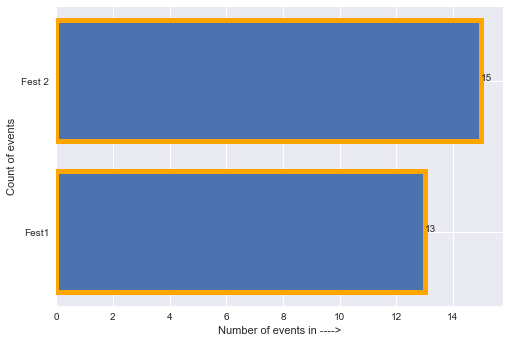

In [41]:
plt.barh(["Fest1", "Fest 2"], [len(events_f1), len(events_f2)], edgecolor = "orange" ,ecolor = "g",animated= True, linewidth = 5)
plt.xlabel("Number of events in ---->")
plt.ylabel("Count of events")
y = [len(events_f1), len(events_f2)]
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
# plt.xlabel()
plt.show()

In [42]:
len(events_f1),len(events_f2)

(13, 15)

In [43]:
counts_f1 = []
events_labels = []
for i in range(1,len(events_f1)+1):
    temp_str = "event_" + str(i)
    count = 0
    for j in range(len(participants)):
        if participants["Fest Num"][j] == "fest_1" and participants["Event Num"][j] == temp_str:
            count += 1
    counts_f1.append(count)
    events_labels.append(temp_str)

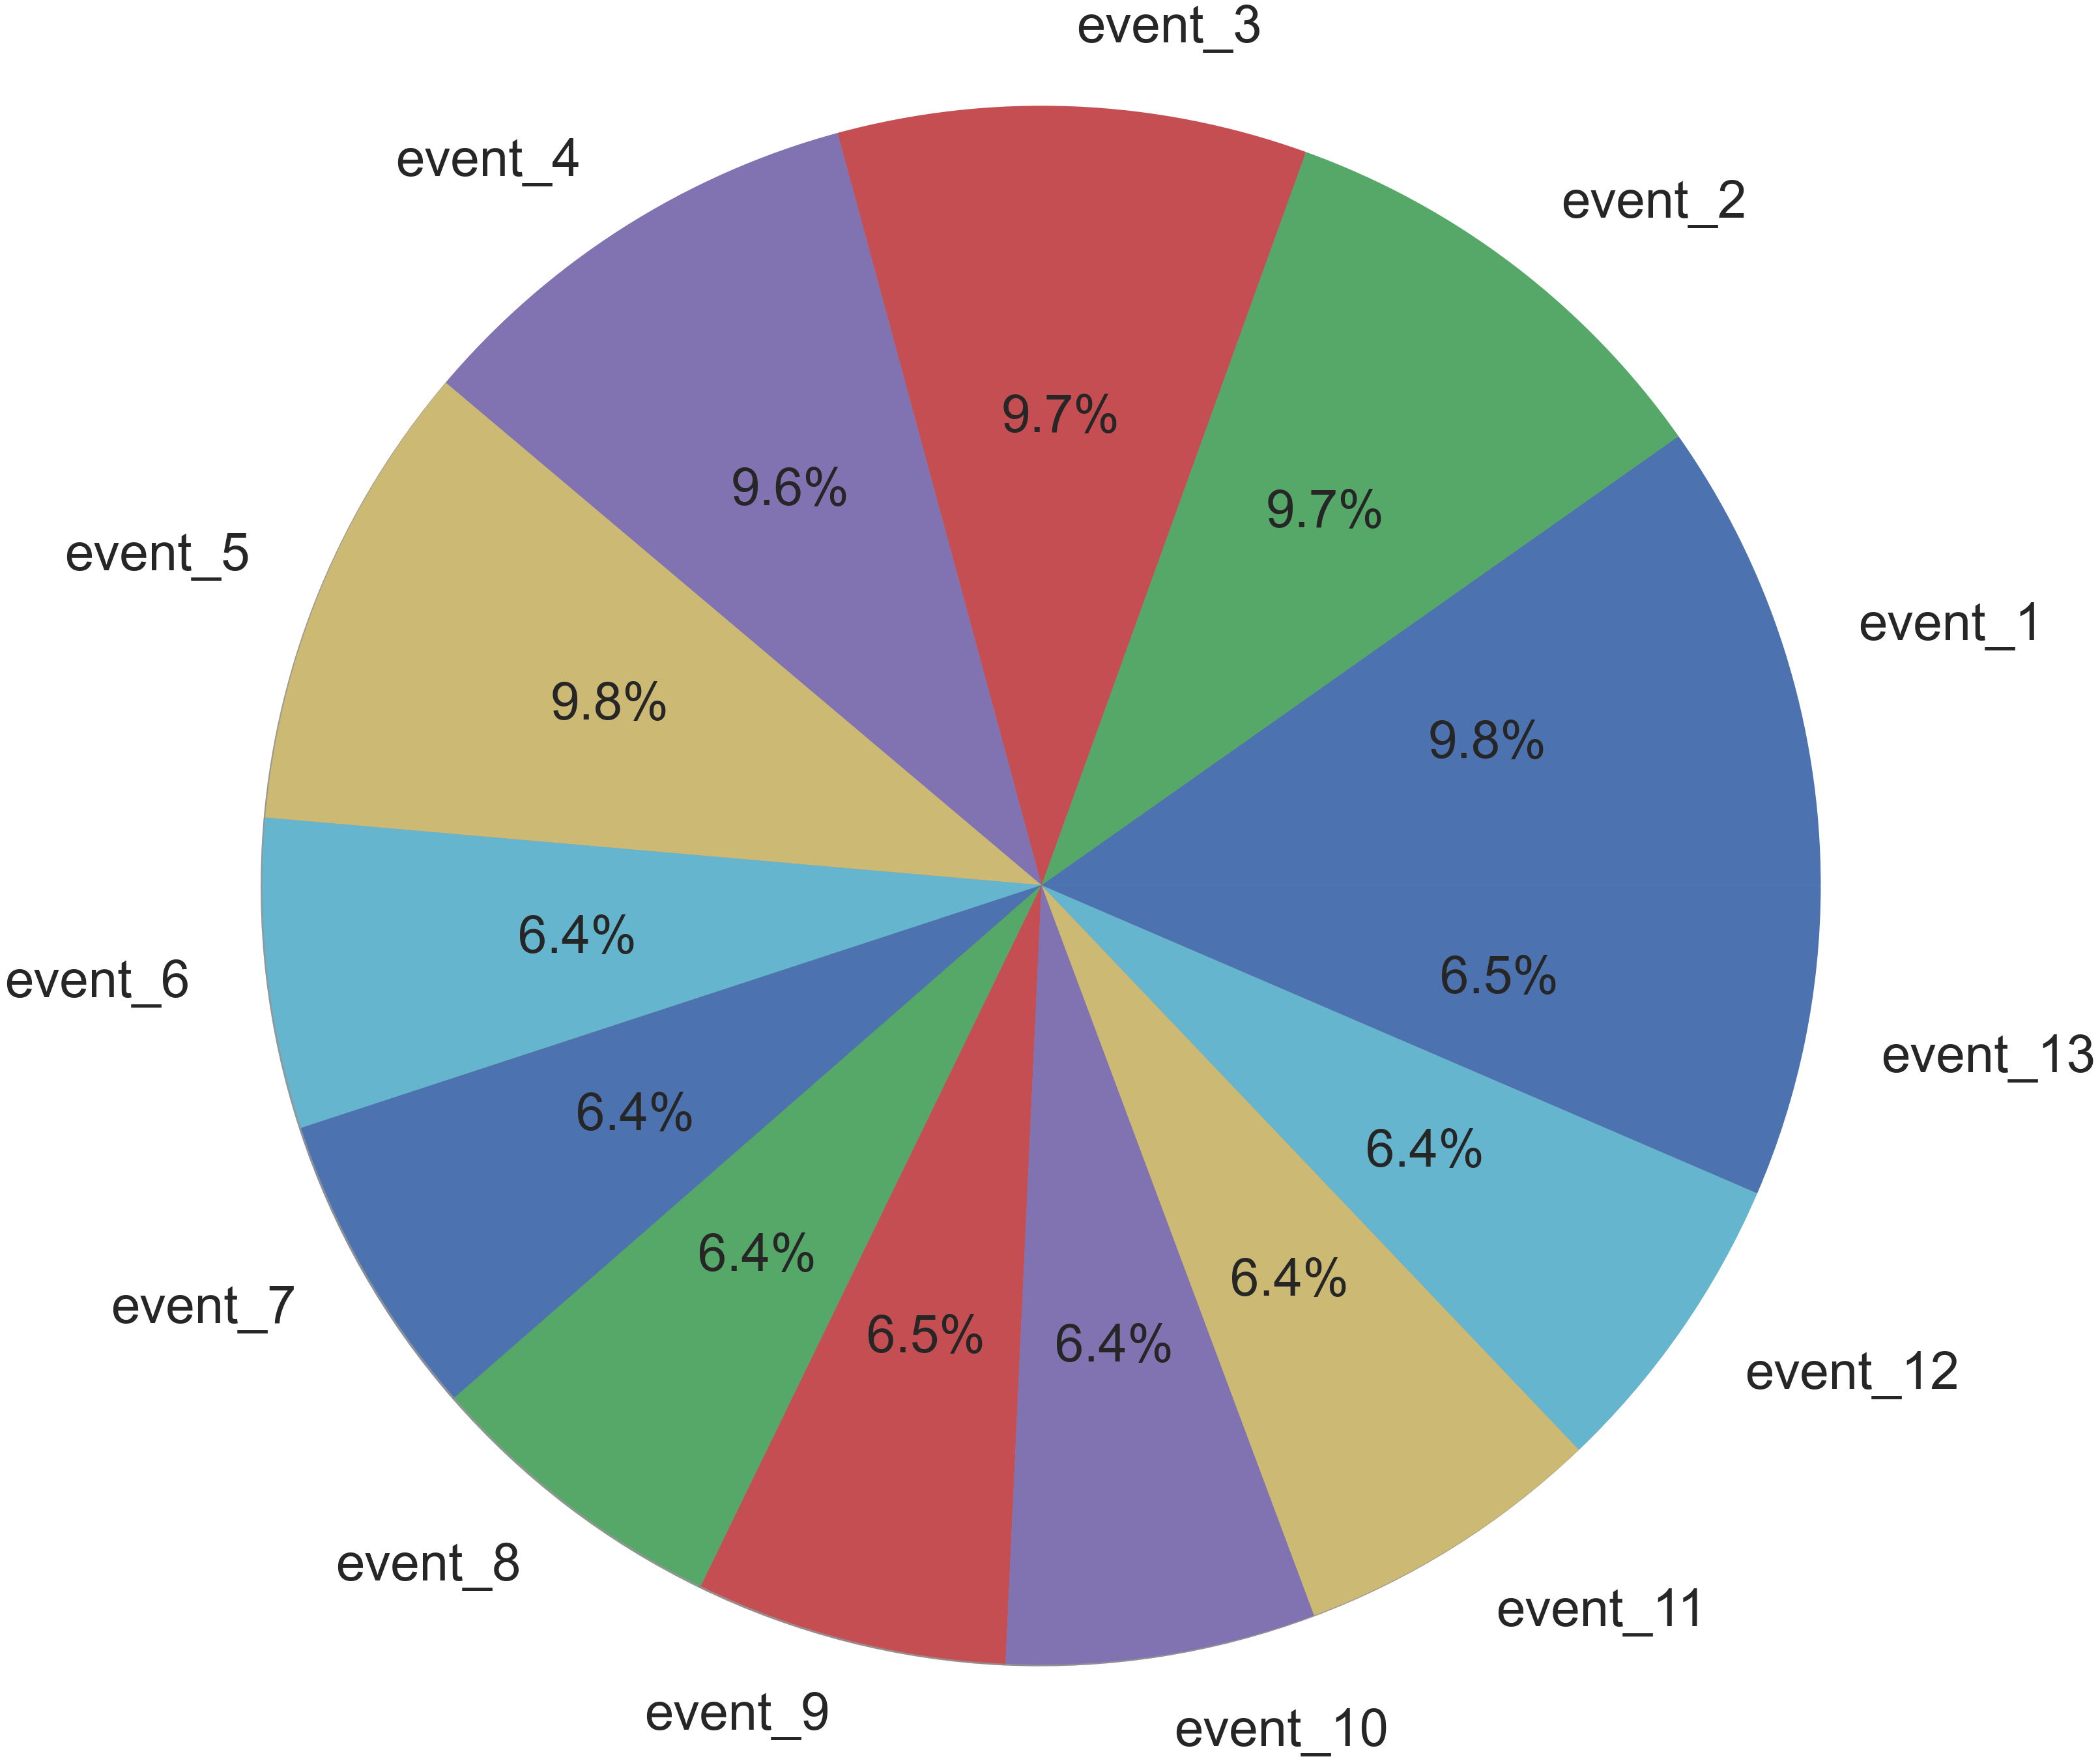

In [44]:
#Distribution of people in the events 

plt.pie(counts_f1, labels = events_labels, autopct = "%1.1f%%",textprops={'fontsize': 80}, labeldistance = 1.1, shadow = True, radius = 10 )
# plt.title("Distribution of participants in events")
plt.show()


In [45]:
counts_f2 = []
events_labels = []
for i in range(1,len(events_f2)+1):
    temp_str = "event_" + str(i)
    count = 0
    for j in range(len(participants)):
        if participants["Fest Num"][j] == "fest_2" and participants["Event Num"][j] == temp_str:
            count += 1
    counts_f2.append(count)
    events_labels.append(temp_str)

In [46]:
len(counts_f2)

15

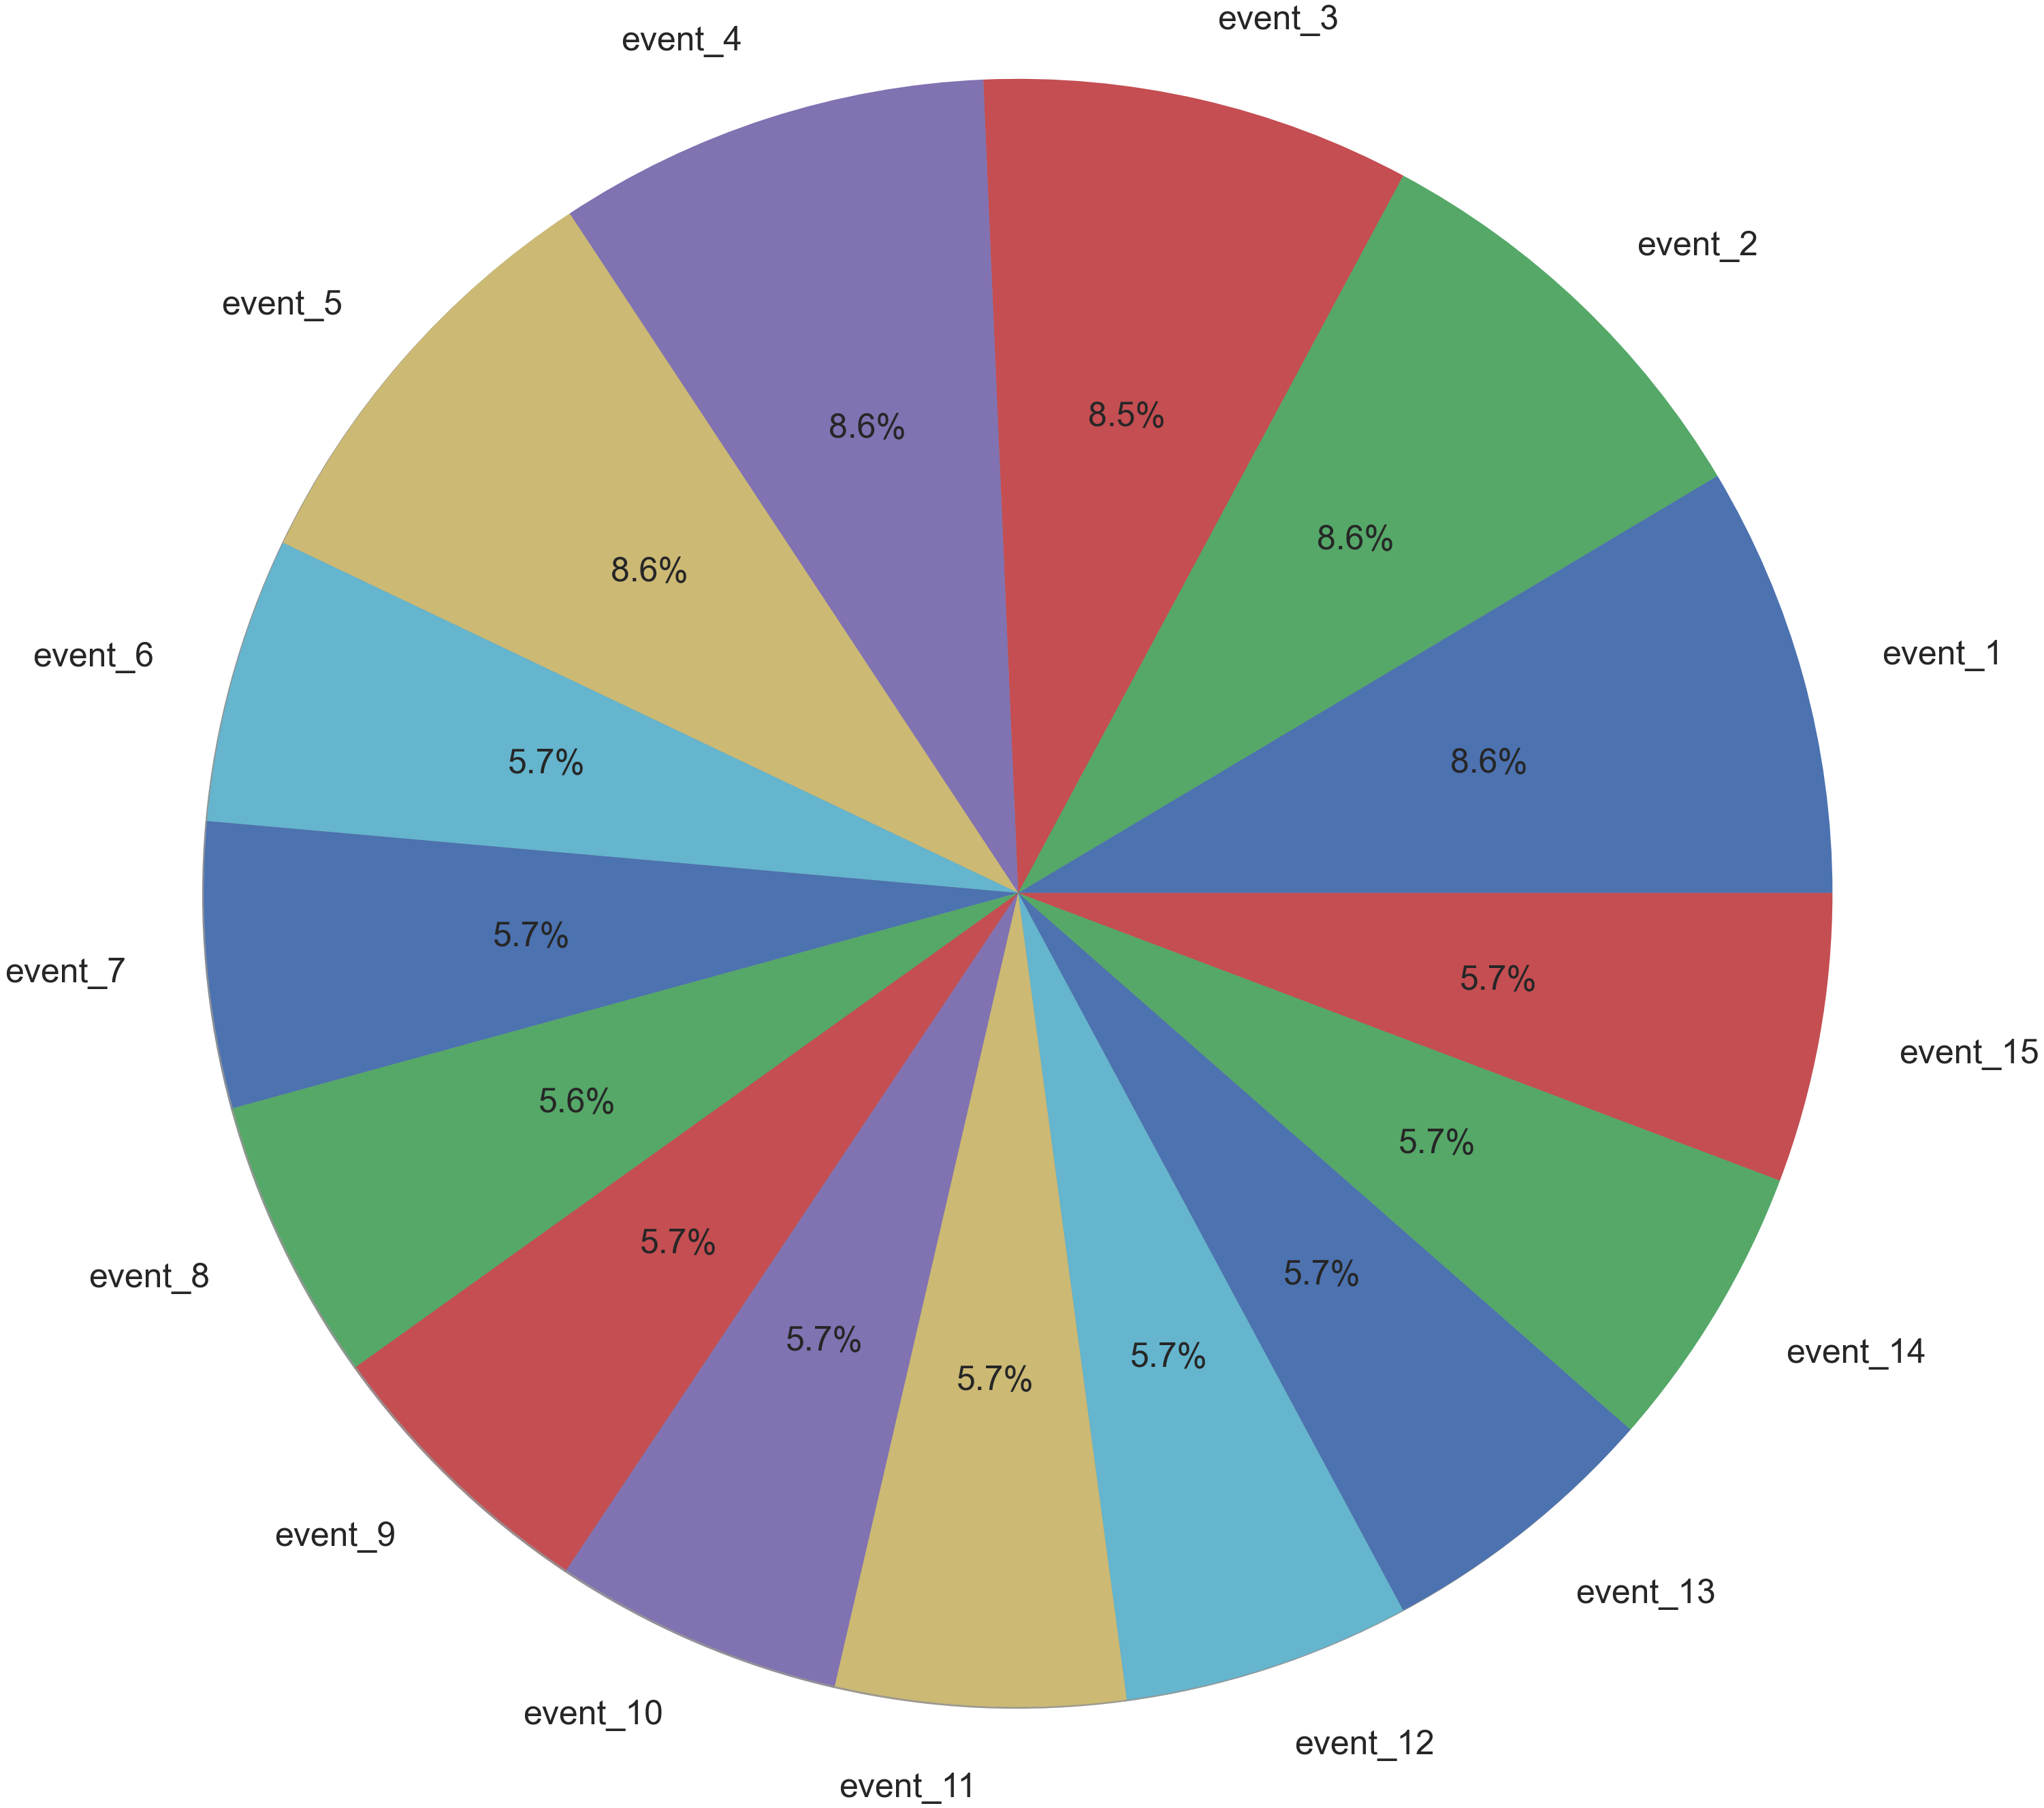

In [47]:
plt.pie(counts_f2, labels = events_labels, autopct = "%1.1f%%",textprops={'fontsize': 50}, labeldistance = 1.1, shadow = True, radius = 10 )
# plt.title("Distribution of participants in events")
plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.suptitle("Quadratic Equation", fontsize=89)
plt.rcParams["figure.autolayout"] = True
plt.show()

In [51]:
batch_17, batch_18 = 0,0

for i in range(len(clubs)):
    temp_arr = str(clubs["RollNumber"][i]).split("X")
    if temp_arr[0] == "17":
        batch_17 += 1
    elif temp_arr[0] == "18":
        batch_18 += 1
    
    

In [52]:
batch_dist = [batch_17, batch_18]

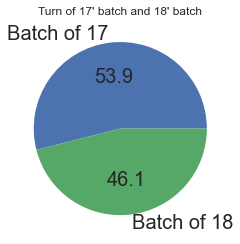

501 428


In [53]:
plt.pie(batch_dist, labels = ["Batch of 17", "Batch of 18"], autopct = "%1.1f", textprops = {'fontsize': 20}
       )

plt.title("Turn of 17' batch and 18' batch")
plt.show()

print(batch_17, batch_18)


In [55]:
clubs

,Club_Name,Name,Event,Role,First Name,Last Name,RollNumber,Name1
0,club_3,darien ma,club_3_event_2,Participant,darien,ma,17XJ1A0220,darien ma
1,club_2,sege schrock,club_2_event_1,Participant,sege,schrock,17XJ1A0165,sege schrock
2,club_2,tete buim,club_2_event_3,Participant,tete,buim,18XJ1A0184,tete buim
3,club_2,loufis emuls,club_2_event_2,Participant,loufis,emuls,17XJ1A0142,loufis emuls
4,club_2,mercezloweber,club_2_event_3,Participant,mercezlo,weber,18XJ1A0211,mercezlo weber
...,...,...,...,...,...,...,...,...
1040,club_1,allissa biddle,club_1_event_2,Participant,allissa,biddle,18XJ1A0260,allissa biddle
1041,club_3,cody garay,club_3_event_1,Participant,cody,garay,18XJ1A0348,cody garay
1042,club_2,alycia woodard,club_2_event_1,Participant,alycia,woodard,17XJ1A0107,alycia woodard
1043,club_1,tasha smalley,club_1_event_2,Participant,tasha,smalley,17XJ1A0180,tasha smalley


In [58]:
clubs_organizers_17b = 0
clubs_organizers_18_b = 0





for i in range(len(clubs)):
    temp_role = str(clubs["Role"][i]).split("_")
    if temp_role[0] == "organiser":
        temp_batch = organ["RollNumber"][i]
        arr = str(temp_batch).split("X")
        if arr[0] == "17":
            clubs_organizers_17b += 1
        if arr[0] == "18":
            clubs_organizers_18_b +=1 
   

In [59]:
batch_club_org = [clubs_organizers_17b, clubs_organizers_18_b]

Distribution of club organizers batchwise

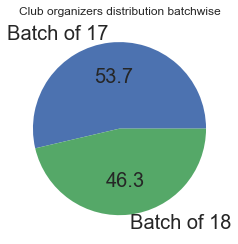

22 19


In [60]:
plt.pie(batch_club_org, labels = ["Batch of 17", "Batch of 18"], autopct = "%1.1f", textprops = {'fontsize': 20}, 
       )
plt.title("Club organizers distribution batchwise")
plt.show()


print(clubs_organizers_17b,clubs_organizers_18_b )

In [63]:
fests_organizers_17b = 0
fests_organizers_18_b = 0





for i in range(len(organizers)):
    temp_role = str(organizers["Role"][i]).split("_")
    if temp_role[0] == "organiser":
        temp_batch = organizers["RollNumber"][i]
        arr = str(temp_batch).split("X")
        if arr[0] == "17":
            fests_organizers_17b += 1
        if arr[0] == "18":
            fests_organizers_18_b +=1 

In [64]:
fests_organizers_17b, fests_organizers_18_b

(12, 6)

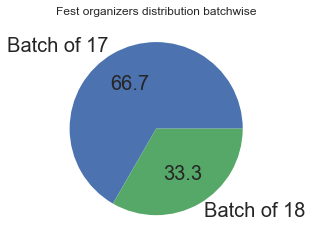

In [65]:
plt.pie([fests_organizers_17b, fests_organizers_18_b], labels = ["Batch of 17", "Batch of 18"], autopct = "%1.1f", textprops = {'fontsize': 20}, radius = 1
       )
plt.title("Fest organizers distribution batchwise")


plt.show()